In [5]:
import cv2
import numpy as np

def load_image(image_path):
    return cv2.imread(image_path)

def apply_gaussian_filter(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

def apply_box_filter(image, ksize=(5, 5)):
    return cv2.boxFilter(image, ddepth=-1, ksize=ksize)

def apply_median_filter(image, ksize=5):
    return cv2.medianBlur(image, ksize)

def apply_laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def apply_histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        return cv2.equalizeHist(image)
    else:  # Color image
        img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# Example usage
if __name__ == "__main__":
    for i in range(1, 301):
        input_image_path = f'linear_transformed_{i}.jpg'
        original_image = load_image(input_image_path)

        if original_image is None:
            print(f"Error loading image: {input_image_path}")
            continue  # Skip this iteration if the image is not loaded

        gaussian_image = apply_gaussian_filter(original_image)
        box_image = apply_box_filter(original_image)
        median_image = apply_median_filter(original_image)
        laplacian_image = apply_laplacian_filter(original_image)
        hist_eq_image = apply_histogram_equalization(original_image)

        # Save transformed images
        cv2.imwrite(f'trans_gaussian/gaussian_transformed_{i}.jpg', gaussian_image)
        cv2.imwrite(f'trans_box/box_transformed_{i}.jpg', box_image)
        cv2.imwrite(f'trans_median/median_transformed_{i}.jpg', median_image)
        cv2.imwrite(f'trans_laplacian/laplacian_transformed_{i}.jpg', laplacian_image)
        cv2.imwrite(f'trans_hist/hist_eq_transformed_{i}.jpg', hist_eq_image)


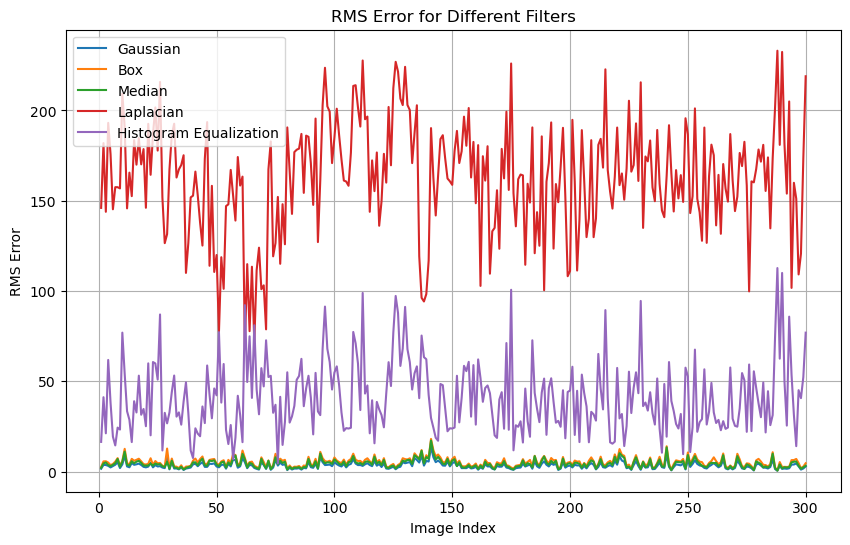

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    return cv2.imread(image_path)

def apply_gaussian_filter(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

def apply_box_filter(image, ksize=(5, 5)):
    return cv2.boxFilter(image, ddepth=-1, ksize=ksize)

def apply_median_filter(image, ksize=5):
    return cv2.medianBlur(image, ksize)

def apply_laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def apply_histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        return cv2.equalizeHist(image)
    else:  # Color image
        img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def calculate_rms(original, transformed):
    return np.sqrt(np.mean((original.astype(np.float32) - transformed.astype(np.float32)) ** 2))

# Example usage
if __name__ == "__main__":
    rms_values = {
        'Gaussian': [],
        'Box': [],
        'Median': [],
        'Laplacian': [],
        'Histogram Equalization': []
    }

    for i in range(1, 301):
        input_image_path = f'linear_transformed_{i}.jpg'
        original_image = load_image(input_image_path)

        if original_image is None:
            print(f"Error loading image: {input_image_path}")
            continue  # Skip this iteration if the image is not loaded

        gaussian_image = apply_gaussian_filter(original_image)
        box_image = apply_box_filter(original_image)
        median_image = apply_median_filter(original_image)
        laplacian_image = apply_laplacian_filter(original_image)
        hist_eq_image = apply_histogram_equalization(original_image)

        # Calculate RMS errors
        rms_gaussian = calculate_rms(original_image, gaussian_image)
        rms_box = calculate_rms(original_image, box_image)
        rms_median = calculate_rms(original_image, median_image)
        rms_laplacian = calculate_rms(original_image, laplacian_image)
        rms_hist_eq = calculate_rms(original_image, hist_eq_image)

        # Store RMS values
        rms_values['Gaussian'].append(rms_gaussian)
        rms_values['Box'].append(rms_box)
        rms_values['Median'].append(rms_median)
        rms_values['Laplacian'].append(rms_laplacian)
        rms_values['Histogram Equalization'].append(rms_hist_eq)

    # Plotting the RMS errors
    plt.figure(figsize=(10, 6))
    for filter_name, rms in rms_values.items():
        plt.plot(range(1, len(rms) + 1), rms, label=filter_name)

    plt.title('RMS Error for Different Filters')
    plt.xlabel('Image Index')
    plt.ylabel('RMS Error')
    plt.legend()
    plt.grid()
    plt.show()
